# James Griffin 
## Math 522 

###### #1 
Create your own Newton optimizer method (including the use of the full Hessian matrix).
Implement this for the first two functions from the first written homework and compare
how well it performs relative to gradient descent, Nesterov, AdaGrad and Adam that you
coded up previously.

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import optimize
import sympy as sy
from sympy import symbols
from math import cos, sqrt, sin 

In [16]:
## importing functions 
x1,x2 = sy.symbols('x1, x2')
f1 = (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2
hessian_f1 = sy.hessian(f1, (x1, x2)).expand()
print("This is the Hesssian for Q1 of the first written")
hessian_f1

This is the Hesssian for Q1 of the first written


Matrix([
[                                  2.0*x2**6 + 2.0*x2**4 - 4.0*x2**3 - 2.0*x2**2 - 4.0*x2 + 6.0, 12.0*x1*x2**5 + 8.0*x1*x2**3 - 12.0*x1*x2**2 - 4.0*x1*x2 - 4.0*x1 + 15.75*x2**2 + 9.0*x2 + 3.0],
[12.0*x1*x2**5 + 8.0*x1*x2**3 - 12.0*x1*x2**2 - 4.0*x1*x2 - 4.0*x1 + 15.75*x2**2 + 9.0*x2 + 3.0,          30.0*x1**2*x2**4 + 12.0*x1**2*x2**2 - 12.0*x1**2*x2 - 2.0*x1**2 + 31.5*x1*x2 + 9.0*x1]])

In [17]:
# x1,x2 = sy.symbols('x1, x2')
# f1 = (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2
# Df1 = f1.diff(x1)
# Df2 = f1.diff(x2)

# Df1_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df1, Df2]))
# df_1 = lambda x: Df1_lambdified(x[0],x[1])[:,0]

In [18]:
Df1_x1 = f_1.diff(x1).expand()
Df1_x1x2 = Df1_x1.diff(x2).expand()
Df1_x2 = f_1.diff(x2).expand()
Df1_x2x1 = Df1_x2.diff(x1).expand()

def get_lambda_func(func):
    func_p = sy.lambdify((x1,x2), func)
    func_l = lambda x: func_p(x[0], x[1])
    return func_l

df1_x1_l = get_lambda_func(Df1_x1)
df1_x1x2_l = get_lambda_func(Df1_x1x2)
df1_x2_l= get_lambda_func(Df1_x2)
df1_x2x1_l = get_lambda_func(Df1_x2x1)


hessian_1 = np.array([df1_x1_l, df1_x1x2_l, df1_x2_l, df1_x2x1_l])

In [19]:
def f_1(x):
    #Beale's function (note that Python indexes starting at 0, not 1)
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2

def df1(x):
    #gradient of Beale's function
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3), 2*x[0]*(1.5-x[0]+x[0]*x[1]) + 4*x[0]*x[1]*(2.25-x[0]+x[0]*x[1]**2) + 6*x[0]*x[1]**2*(2.625-x[0]+x[0]*x[1]**3)])

In [20]:
def get_H(H, x):
    return np.array(([H[0](x), H[1](x)], [H[2](x), H[3](x)]))


In [21]:
def f_2(x):
    #Himmelblau's function
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

def df2(x):
    #gradient of Himmelblau's function
    return np.array([4*x[0]*(x[0]**2+x[1]-11) + 2*(x[0]+x[1]**2-7), 2*(x[0]**2+x[1]-11) + 4*x[1]*(x[0]+x[1]**2-7)])

x1,x2 = sy.symbols('x1, x2', real=True)
f2 = (x1**2 + x2 - 11)**2 + (x1 +  x2**2 - 7)**2 
f2


df2_x1 = f2.diff(x1)
df2_x2 = f2.diff(x2)
df2_x1x2 = df2_x1.diff(x2).expand()
df2_x2x1 = df2_x2.diff(x1).expand()

df2_x1_l = get_lambda_func(df2_x1)
df2_x1x2_l = get_lambda_func(df2_x1x2)
df2_x2_l= get_lambda_func(df2_x2)
df2_x2x1_l = get_lambda_func(df2_x2x1)


print("This is the Hesssian for Q2 of the first written")
hessian_f2 = sy.hessian(f2, (x1, x2)).expand()
hessian_f2

This is the Hesssian for Q2 of the first written


Matrix([
[12*x1**2 + 4*x2 - 42,          4*x1 + 4*x2],
[         4*x1 + 4*x2, 4*x1 + 12*x2**2 - 26]])

In [22]:
hessian_2 = np.array([df2_x1_l, df2_x1x2_l, df2_x2_l, df2_x2x1_l])

In [23]:
get_H(hessian_1, [-5.17205458,  2.48045137])

array([[-2298.6440169 , -5883.07520914],
       [14897.70776906, -5883.07520914]])

In [80]:
def newtons(f,df,x0,H, eta=.001, N=1000, eps=1e-10):
    #Initialize ierations 
    iterations = 0
    #store f values 
    f_vals = []
    f_norms = []
    #start x_0 at guess 
    x_old = x0
    print(x_old)
    #print(type(x_old))
    v = -eta*df(x_old) #the initial velocity 
    x_new = x_old+v #the first step forward
    while np.linalg.norm(x_new-x_old)>eps and iterations < N:
        #f_vals.append(np.linalg.norm(x_new-x_old))
        x_old = x_new
        #print(x_old)
        H_old = get_H(H, x_old)
        #print(H_old)
        x_new = x_old-eta*np.linalg.solve(H_old, df(x_old))
        #print(x_new)
        
        iterations+=1
        f_norms.append(np.linalg.norm(x_new-x_old))
        f_vals = f(x_new-x_old)
    return x_new, f_vals, f_norms, #iterations#x_new#, f(xnew)


In [81]:
f1_point, f1_val, f1_norms = newtons(f_1, df1, x0=np.array([3.1,.5]),
                                              H=hessian_1,eta=.001,
                                              N = 10000)
f1_point

[3.1 0.5]


array([-6.90031563,  0.50118188])

Comparing the point of where my newtons method got to vs the starting point, which was rerally close to the original. So esentially im getting further away even though I'm iterating 10k times. 

And here below we see the plot of the size of the norm, esentially our information gain is essentially zero right after the start. 

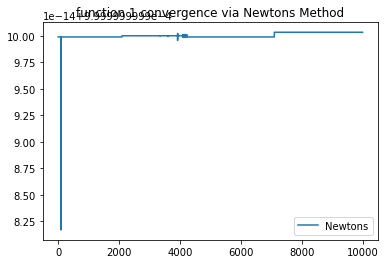

In [84]:
plt.plot(f1_norms, label = 'Newtons')
plt.title("function 1 convergence via Newtons Method")
plt.legend()
plt.show()

In [86]:
f2_point, f2_val, f2_norms = newtons(f_2, df2, x0=np.random.rand(2),
                                              H=hessian_1,eta=.0001,
                                              N = 10000)
f2_point

[0.69265372 0.72641031]


array([0.83386361, 1.49034445])

Convergence much more nicely here in this function, 

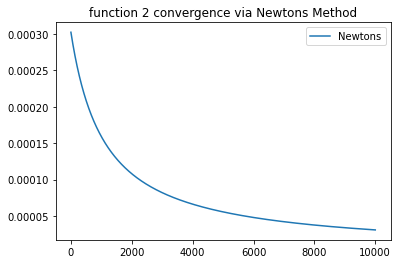

In [87]:
plt.plot(f2_norms, label = 'Newtons')
plt.title("function 2 convergence via Newtons Method")
plt.legend()
plt.show()

###### #2
Do the same as the previous problem but now for BFGS. Compare the convergence of the
full Newton method with BFGS. Does it make a big difference? Illustrate the differences
with figures (plot convergence of the minima for example).

In [128]:
def bfgs(df, x0, maxiter = 1000, alpha = .001, eps =1e-10):
    iters = 0
    x_old = x0
    s_old = np.ones(len(x0))
    u_old = np.ones(len(df(x0)))
    g_old = df(x0)
    H_old = (s_old.T@u_old / np.linalg.norm(u_old)) * np.eye(df(x0).shape[0])
    conv = []
    for i in range(maxiter):
        
        H_new = (np.eye(len(x_old)) - (np.outer(s_old,u_old) / np.inner(s_old,u_old))) @ H_old @ (np.eye(len(x_old)) - (np.outer(u_old,s_old)/np.inner(u_old,s_old))) + np.outer(s_old,s_old) / (u_old@s_old)
        
        x_new = x_old - alpha*g_old@H_new
        g_new = df(x_new)
        conv.append(np.linalg.norm(x_new - x_old))
        iters += 1
        if np.linalg.norm(H_new-H_old)<eps:
            break
        if g_new.all() == 0:
            break
        s_old = (x_new - x_old)
        u_old = (g_new - g_old)
        g_old = g_new
        x_old = x_new
        H_old = H_new
        
    return x_new, conv
        

In [129]:
bfgs_f1_pt, bfgs_f1_conv = bfgs(df1, np.random.rand(2))
bfgs_f2_pt, bfgs_f2_conv = bfgs(df2, np.random.rand(2))

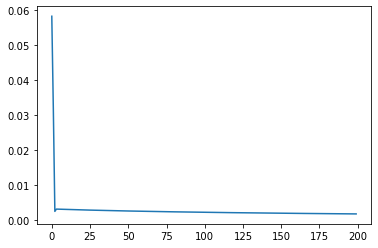

In [130]:
plt.plot(bfgs_f2_conv[:200])

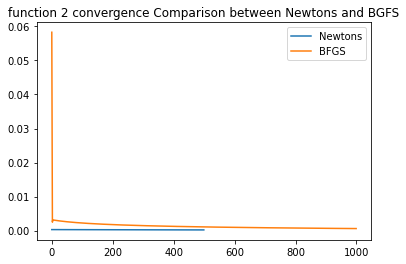

In [131]:
plt.plot(f2_norms[:500], label = 'Newtons')
plt.plot(bfgs_f2_conv, label = "BFGS")
plt.title("function 2 convergence Comparison between Newtons and BGFS")
plt.legend()
plt.show()

Thats super intresting, the bfgs goes up and hen comes way down and converges in the first 400 where Newtons didnt converge to a really good spot for the first 10,000 iterations.

###### #3 
Now adapt your version of BFGS to work for the other functions from the first written HW.
Does this work as well, particularly for the last three functions that are higher dimensional?

In [132]:
#question 3

def f3(x):
    return -(x[1]+47)*sin(sqrt(abs(x[0]/2 + x[1] + 47))) - x[0]*sin(sqrt(abs(x[0] - (x[1] + 47))))
    
def df3(x):
    return np.array([x[0]*cos(sqrt(abs(-x[0] + x[1] + 47)))*np.sign(-x[0] + x[1]+47)/(2*sqrt(abs(-x[0] + x[1]+47)))
              + (-x[1] - 47)*cos(sqrt(abs(x[0]/2 + x[1] + 47)))*np.sign(x[0]/2 + x[1]+47)/(4*sqrt(abs(x[0]/2 + x[1]+47)))
              - sin(sqrt(abs(-x[0] + x[1] + 47))),
              
              x[0]*cos(sqrt(abs(-x[0] + x[1] + 47)))*np.sign(-x[0] + x[1]+47)/(2*sqrt(abs(-x[0] + x[1]+47)))
              + (-x[1] - 47)*cos(sqrt(abs(x[0]/2 + x[1] + 47)))*np.sign(x[0]/2 + x[1]+47)/(2*sqrt(abs(x[0]/2 + x[1]+47)))
              - sin(sqrt(abs(x[0]/2 + x[1] + 47)))])

In [133]:
#question 4 
x1, x2 = symbols('x1 x2', real = True)
f4 = -20*sy.exp(-0.2*sy.sqrt(0.5*(x1**2 + x2**2))) - sy.exp(0.5*(sy.cos(2*sy.pi*x1)+sy.cos(2*sy.pi*x2))) + sy.exp(1) + 20

f4p = sy.lambdify((x1,x2), f4)
#f4 = lambda x: f4p(x[0], x[1])

Df4_1 = f4.diff(x1)
Df4_2 = f4.diff(x2)

f4 = lambda x: f4p(x[0], x[1])
df4_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df4_1, Df4_2]))
df4 = lambda x: df4_lambdified(x[0],x[1])[:,0]

In [134]:
#Question 5  
x1,x2 = sy.symbols('x1, x2', real=True) #not dealing with imaginary roots 
f_5 = sy.sin(2*sy.pi*x1)**2 + (x1 - 1)**2 * (1 + sy.sin(3*sy.pi*x2)**2) + (x2-1)**2 * (1 + sy.sin(2*sy.pi*x2)**2)
f5p = sy.lambdify((x1,x2), f_5)
f5 = lambda x: f5p(x[0], x[1])

Df1 = f_5.diff(x1)
Df2 = f_5.diff(x2)

Df5_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df1, Df2]))
df5 = lambda x: Df5_lambdified(x[0],x[1])[:,0]

In [135]:
#Question 6 
def f6(x):
    f = 0
    for k in range(5):
        f += x[k]**4 - 16*x[k]**2 + 5*x[k]
    f = f*1/2
    return f 

def df6(x):
    df = 4*x**3 - 32*x +5
    return  df 

In [136]:
#Question 7 
def f7(x):
    f = 0
    for k in range(999):
        f += x[k]**2 - 10*np.cos(2*np.pi*x[k])
    f += 10000
    return f 

def df7(x):
    #df = [0]*1000
    df = 2*(x) - 20*np.pi*np.sin(2*np.pi*x)
    return  df 
    

In [137]:
def f8(x):
    #Rosenbrock's function
    f = 0
    for kk in range(999):
        f+= 100*(x[kk+1]-x[kk]**2)**2 + (1-x[kk])**2
    return f

def df8(x):
    #gradient of Rosenbrock's function
    df = [0]*1001
    df[1:-1] = 200*(x[1:-1]-x[0:-2]**2) - 400*x[1:-1]*(x[2:]-x[1:-1]**2) - 2*(1-x[1:-1])
    #df[k] = 200*(x[k] - x[k-1]**2) ....
    df[0] = -400*x[0]*(x[1]-x[0]**2)- 2*(1-x[0])
    df[1000] = 200*(x[1000]-x[999]**2)
    return np.array(df)


In [138]:
bfgs_f2_pt, bfgs_f2_conv = bfgs(df2, np.random.rand(2))
bfgs_f3_pt, bfgs_f3_conv = bfgs(df3, np.random.rand(2))
bfgs_f4_pt, bfgs_f4_conv = bfgs(df4, np.random.rand(2))
bfgs_f5_pt, bfgs_f5_conv = bfgs(df5, np.random.rand(2))

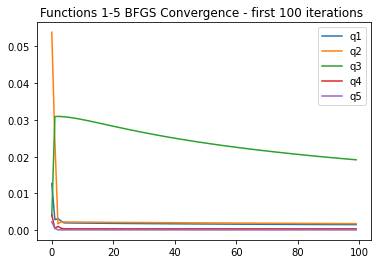

In [139]:
plt.plot(bfgs_f1_conv[:100], label = "q1")
plt.plot(bfgs_f2_conv[:100], label = "q2")
plt.plot(bfgs_f3_conv[:100], label = "q3")
plt.plot(bfgs_f4_conv[:100], label = "q4")
plt.plot(bfgs_f5_conv[:100], label = "q5")
plt.title("Functions 1-5 BFGS Convergence - first 100 iterations ")
plt.legend()
plt.show()

In [140]:
bfgs_f6_pt, bfgs_f6_conv = bfgs(df6, np.random.rand(5))

In [148]:
#q7
bfgs_f7_pt, bfgs_f7_conv =bfgs(df7, np.ones(1000)*1.1)
#q8 
bfgs_f8_pt, bfgs_f8_conv =bfgs(df8, np.ones(1001)*1.3, alpha = .00001)


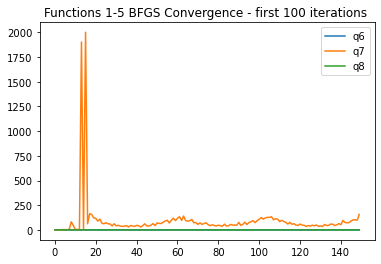

In [151]:
plt.plot(bfgs_f6_conv[:150], label = "q6")
plt.plot(bfgs_f7_conv[:150], label = "q7")
plt.plot(bfgs_f8_conv[:150], label = "q8")
plt.title("Functions 1-5 BFGS Convergence - first 100 iterations ")
plt.legend()
plt.show()

Text(0.5, 1.0, 'convergence of only 8')

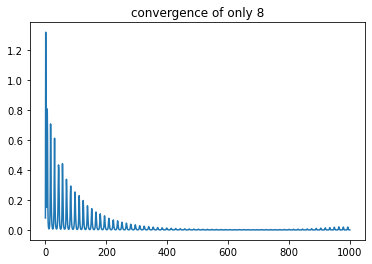

In [152]:
plt.plot(bfgs_f8_conv)
plt.title("convergence of only 8")

So 7 diverges, decreasing to less than 100 but never really approaching zero and having this random stochastic noise. 8 only converges with a super tiny learning rate, if the learning rate was any bigger than .00001, it would also diverge, so it diverges, but the parameters given are that the initial guesses are all rather close to the true minimums 1.3 vs 1.1 and the learning  rate is tiny. 

###### #4 
Final horrible optimization algorithm, I promise). Code up AmsGrad (equation 86 from
the review article) which should just be a modification of the code that you already devel-
oped for Adam. Do you notice any differences in convergence properties etc. compared
with Adam?

In [73]:
def ams_grad(f,df,x0, b1=.9, b2=.999, e=.01, m=.9, eta=1e-3,  N=1000, eps = 1e-12):
    iteration = 0
    fs = []
    xold = x0
    g = df(xold)
    m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
    v_old = np.sqrt((1-b2)*df(xold)**2)
    xnew = xold  - eta*(sqrt(1-b2))/(1-b1)*m/(v_old+e)
    
    while np.linalg.norm(xnew-xold)>eps and iteration < N:
        
        xold = xnew
        m = b1*m + (1-b1)*df(xold)
        v_new = np.sqrt((b2*v_old)+(1-b2)*df(xold)**2)
        xnew =  xold - eta*((sqrt(1-b2))/(1-b1))*m/(v_old+e)
        v_new = np.max([np.linalg.norm(v_old),np.linalg.norm(v_new)])
        iteration += 1 
        fs.append(np.linalg.norm(xnew-xold))
    return xnew, fs

In [158]:
ams_f1_pt, ams_f1_conv = ams_grad(f1, df1, np.random.rand(2))
ams_f2_pt, ams_f2_conv = ams_grad(f2, df2, np.random.rand(2))

In [159]:
def adam(f,df,x0, b1=.9, b2=.999, e=.01, m=.9, eta=1e-3,  N=1000, eps = 1e-12):
    iteration = 0
    fs = []
    xold = x0
    g = df(xold)
    m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
    v = np.sqrt((1-b2)*df(xold)**2)
    xnew = xold  - eta*(sqrt(1-b2))/(1-b1)*m/(v+e)
    
    while np.linalg.norm(xnew-xold)>eps and iteration < N:
        
        xold = xnew
        m = b1*m + (1-b1)*df(xold)
        v = np.sqrt((b2*v)+(1-b2)*df(xold)**2)
        #print(type(v))
        xnew =  xold - eta*((sqrt(1-b2))/(1-b1))*m/(v+e)
        iteration += 1 
        fs.append(np.linalg.norm(xnew-xold))
    return xnew, fs

In [160]:
m_f1_point, m_f1_vals = adam(f1, df1, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f2_point, m_f2_vals = adam(f2, df2, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)

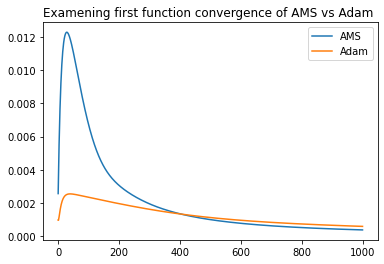

In [162]:
plt.plot(ams_f1_conv, label = 'AMS')
plt.plot(m_f1_vals, label = "Adam")
plt.title("Examening first function convergence of AMS vs Adam ")
plt.legend()
plt.show()

Here we see  that  both  approaches clearly converge both converge - and relitively at the same  rate, AMS apears  to be worse initiall, but  after about 400 iterations, it  becomes  slightly better 

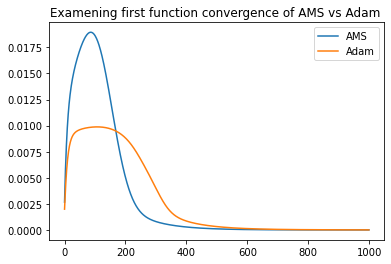

In [163]:
plt.plot(ams_f2_conv, label = 'AMS')
plt.plot(m_f2_vals, label = "Adam")
plt.title("Examening first function convergence of AMS vs Adam ")
plt.legend()
plt.show()

Similar as above,  AMS  starts worse, but then becomes better faster, however,  these two in the limit are  very similar 

In [2]:
import sympy as sy
from sympy import symbols

<function sympy.functions.elementary.miscellaneous.sqrt(arg, evaluate=None)>